In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tables
from phd.utils.convertor_tools import direction_to_degree
from phd.utils.path_tools import get_attrs_values, find_by_meta
from phd.thunderstorm.dwyer_feedback import load_reversed_data

In [4]:
path = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_v2.hdf5"

In [3]:
with tables.open_file(path) as h5file:
    for group in h5file.root:
        for node in h5file.list_nodes(group):
            print(node)
        break


/sim0001/meta (Array()) ''
/sim0001/particle_cylinder_gamma (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0001/particle_cylinder_number (Table(200,), fletcher32, shuffle, zlib(3)) ''
/sim0001/particle_detector_electron (Table(0,), fletcher32, shuffle, zlib(3)) ''
/sim0001/particle_detector_number (Table(200,), fletcher32, shuffle, zlib(3)) ''


In [4]:
theta, energy, probability = load_reversed_data(path)

In [41]:
(probability == 1).sum()
indx = probability == 1
print(energy[indx])
print(theta[indx])

[0.1  0.15 0.1  0.1  0.1  0.1  0.1  0.1 ]
[ 0.          0.          9.93636707 19.94844359 30.00291093 49.98411256
 60.         70.00122819]


In [9]:
mpl.rcParams.update(
    {'font.family': 'sans-serif',
     'font.size': 16,
     'axes.labelsize': 16,
     'xtick.labelsize': 16,
     'ytick.labelsize': 16,
     'legend.fontsize': 16})

In [10]:
def plot(path, field=8e-4):
    theta, energy, probability = load_reversed_data(path, field)
    xi = np.sort(np.unique(theta))
    yi = np.sort(np.unique(energy))
    X,Y = np.meshgrid(xi,yi)
    Z = np.zeros(X.shape)
    for t, e, p in zip(theta, energy, probability):
        indx = np.where(xi == t)[0][0]
        indy = np.where(yi == e)[0][0]
        Z[indy, indx] = p
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=14);
    ax.set_title("Электрическое поле {} кВ/см".format(field*1e4))
    ax.set_xlabel(r"$\theta$, градусы")
    ax.set_ylabel(r"Энергия, МэВ")
    plt.tight_layout()
    plt.savefig("reverse.png", dpi=600)

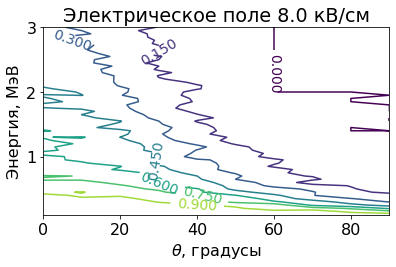

In [11]:
plot(path)

In [10]:
from scipy.interpolate import  LinearNDInterpolator
inter = LinearNDInterpolator((theta, energy), probability)

/sim0001/particle_detector_number._v_attrs (AttributeSet), 18 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'electron',
    NROWS := 100,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0001',
    text := '/df/project test\n/df/gdml .././gdml/0.gdml\n/thunderstorm/physics standard_opt_4\n/thunderstorm/stacking particle_cylinder\n/thunderstorm/addParticleInPCS gamma\n/thunderstorm/addParticleInPD e-\n/thunderstorm/cut/energy 0.05\n\n/gps/particle e-\n/gps/number 1\n/gps/direction 0.0 0 1.0\n/gps/ene/mono 0.1 MeV\n/gps/position 0. 0. 0. m\n/run/beamOn 100\n',
    values_gdml_fieldValueZ := 0.0008,
    values_gdml_height := 0,
    values_macros_cut := 0.05,
    values_macros_direction := '0.0 0 1.0',
    values_macros_energy := 0.1,
    values_macros_number := 100,
    values_macros_particle := 'e-',
    values_macros_path := '.././gdml/0.gdml',
    values_macros_posZ := 200,
    values_time := 2.973478908999823]


In [4]:
path1 = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_1.hdf5"
path2 = "/mnt/storage2/phd/data/thunderstorm/reversed_1/grid_2.hdf5"
fields = get_attrs_values(path1, "values_gdml_fieldValueZ")

In [14]:
def load_reversed_energy(path, field=8e-4, height=0):
    paths = find_by_meta(path,target_node="particle_detector_electron", values_gdml_fieldValueZ=field, values_gdml_height = height)
    result = []
    energy = []
    theta = []
    with tables.open_file(path) as h5file:
        for path_node in paths:
            table = h5file.get_node(path_node)
            data = table.read()
            result.append(data)
            energy.append(table.attrs["values_macros_energy"])
            theta.append(direction_to_degree(table.attrs["values_macros_direction"]))
    return np.array(theta), np.array(energy), result

In [16]:
theta, energy, result = load_reversed_energy(path)


In [17]:
mean_energy = list(map(lambda x: x['energy'].mean(), result))

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
def my_min(x):
    if x.size !=0:
        return x["energy"].min()
    else:
        return 0

min_energy = list(map(my_min, result))


In [30]:
def my_max(x):
    if x.size !=0:
        return x["energy"].max()
    else:
        return 0

max_energy = list(map(my_max, result))

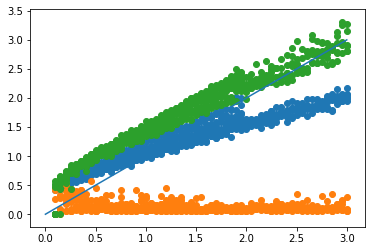

In [31]:
plt.plot(np.linspace(0,3), np.linspace(0,3))
plt.scatter(energy, mean_energy)
plt.scatter(energy, min_energy)
plt.scatter(energy, max_energy)

In [33]:
mean_theta = list(map(lambda x: x['theta'].mean(), result))

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


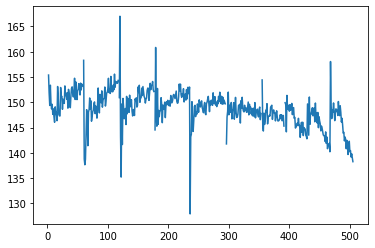

In [35]:
plt.plot(np.rad2deg(mean_theta))


In [17]:
def plot_energy(path, field=8e-4, heigth=0):
    theta, energy, result = load_reversed_energy(path, field, heigth)
    # min_energy = list(map(my_min, result))
    # max_energy = list(map(my_max, result))
    mean_energy = list(map(lambda x: x['energy'].mean(), result))
    plt.plot(np.linspace(0,3), np.linspace(0,3))
    plt.scatter(energy, mean_energy)
    # plt.scatter(energy, min_energy)
    # plt.scatter(energy, max_energy)
    plt.xlabel("Начальная энергия, МэВ")
    plt.ylabel("Энергия после разворота, МэВ")
    plt.title("Электрическое поле {} кВ/см".format(field*1e4))
    plt.tight_layout()
    plt.savefig("reverse_energy.png", dpi = 600)

/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


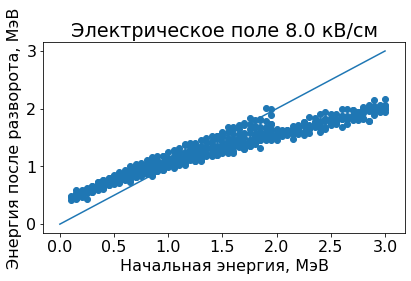

In [18]:
plot_energy(path)



/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
/home/zelenyy/miniconda3/envs/phd-code/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


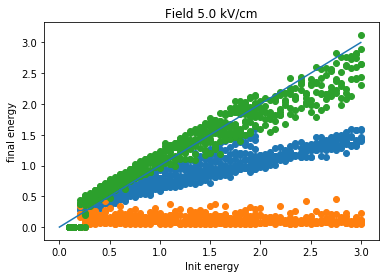

In [38]:
plot_energy(path, field=5e-4)